In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from tqdm import tqdm

random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42) 

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
torch.use_deterministic_algorithms(True)

In [2]:
print(torch.initial_seed()) 

42


In [3]:
START = '1960-01-01'
TICKER = '^GSPC' # S&P500 Index

data = yf.download(
    TICKER,
    start = START,
    progress = False,
    interval = '1wk'
)

In [4]:
returns = data['Close'].pct_change(1).dropna()

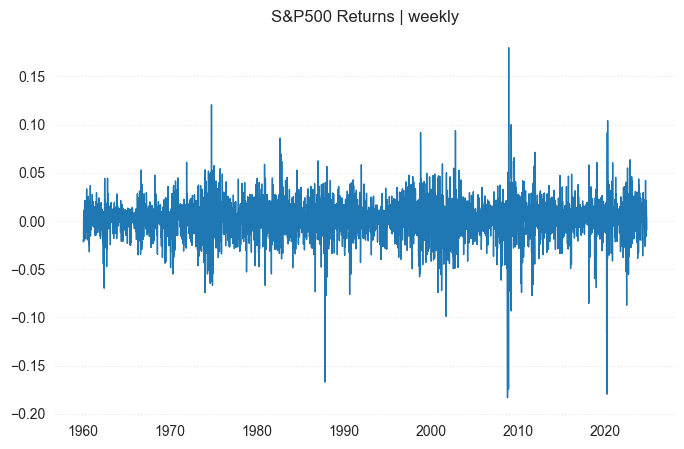

In [5]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(
    returns,
    lw = 1
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('S&P500 Returns | weekly')
plt.show()

In [6]:
from FinancialDeepLearning.tsa.rnn import SimpleRecurrentNeuralNet

rnn = SimpleRecurrentNeuralNet(
    data = returns,
    p = 3,
    method = 'rnn'
)

In [7]:
simple_rnn = rnn.fit(
    criterion = 'mse',
    optimizer = 'adam',
    activation_function = 'sigmoid',
    hidden_layers = 2
)

100%|██████████| 10/10 [00:17<00:00,  1.72s/it]


In [8]:
print(rnn.summary())

                        RNN Results
Dep. Variable: predicted        No. Observations: 3376      
Model:         RNN(3)           Log Likelihood    8109.580  
Date:          Wed, 02 Oct 2024 AIC               -16209.160
Time:          01:30:02         BIC               -16178.537
Sample:        3376             HQIC              -16198.211
-------------------------------------------------------------
           coef   std err     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------
const    -0.1057   0.0036  -29.4222  0.0000  -0.1128  -0.0987
RNN.L1    0.4100   0.0174   23.5099  0.0000   0.3758   0.4441
RNN.L2   -0.2305   0.0174  -13.2174  0.0000  -0.2647  -0.1963
RNN.L3   -0.3887   0.0174  -22.2959  0.0000  -0.4228  -0.3545
------------------------------------------------------------
Ljung-Box (L1) (Q):       18.71   Jarque-Bera (JB):  9226.76
Prob(Q):                  0.04    Prob(JB):          0.00   
Heteroskedasticity (H):   147.42  Skew:   

In [9]:
list(simple_rnn.named_parameters())

[('rnn.weight_ih_l0',
  Parameter containing:
  tensor([[ 3.6063e-01, -1.7635e-02, -3.7567e-05],
          [ 5.1122e-01,  3.2171e-01, -5.7071e-03],
          [-3.1034e-01, -1.1723e-01,  6.4117e-01]], requires_grad=True)),
 ('rnn.weight_hh_l0',
  Parameter containing:
  tensor([[-0.4236,  0.5018,  0.1081],
          [ 0.4266,  0.0782,  0.2784],
          [-0.0815,  0.4451,  0.0853]], requires_grad=True)),
 ('rnn.bias_ih_l0',
  Parameter containing:
  tensor([-0.3943,  0.1994, -0.3261], requires_grad=True)),
 ('rnn.bias_hh_l0',
  Parameter containing:
  tensor([-0.1925, -0.1822,  0.3229], requires_grad=True)),
 ('rnn.weight_ih_l1',
  Parameter containing:
  tensor([[-0.5739, -0.3437, -0.0295],
          [-0.2289,  0.1455, -0.7161],
          [ 0.6299, -0.3971,  0.3040]], requires_grad=True)),
 ('rnn.weight_hh_l1',
  Parameter containing:
  tensor([[ 0.0961, -0.1875,  0.3568],
          [ 0.0900,  0.4665,  0.0631],
          [-0.1821,  0.1551, -0.1566]], requires_grad=True)),
 ('rnn.bias_